# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

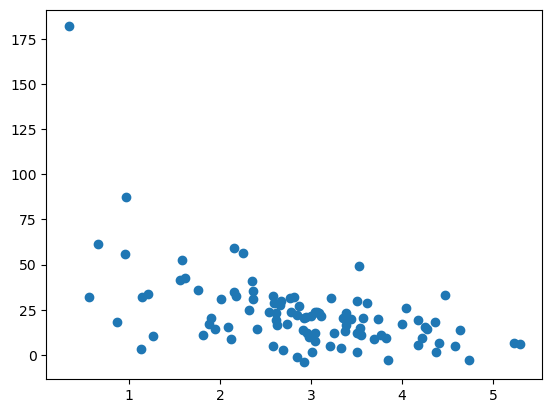

In [2]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [3]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

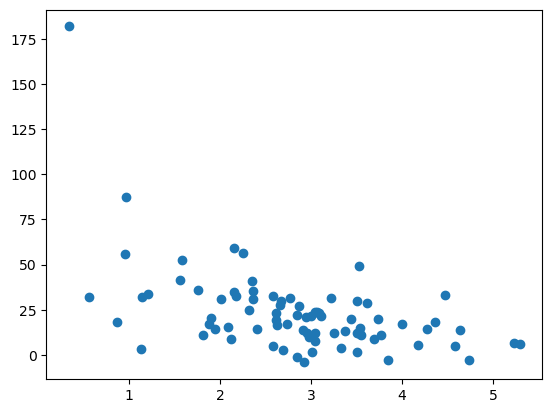

In [4]:
scatter(trainX, trainY)

And our test dataset:

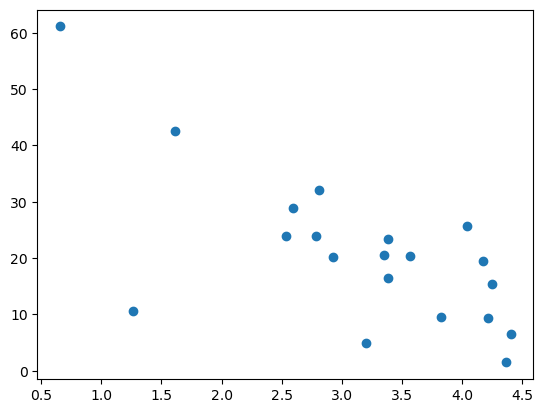

In [5]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data

In [6]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

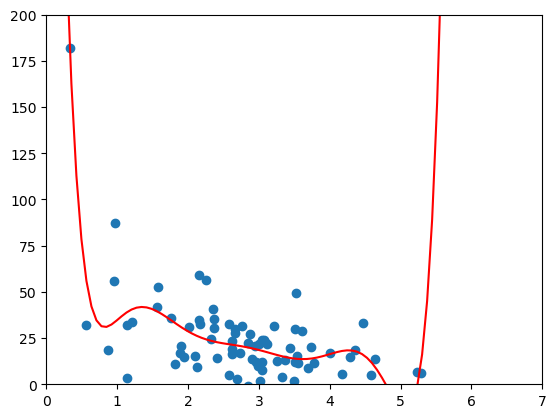

In [7]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

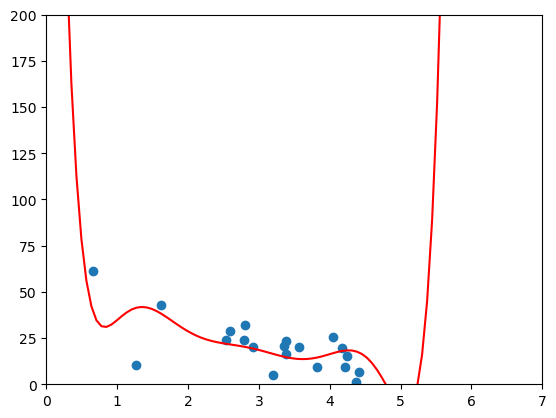

In [8]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

From the plot can you predict if we created a good model?

Try calculating the R-squared on both sets (train and test) what can you conclude?

To fit the test data :

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.3001816861073521


To fit the training data :

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.642706951469161


PS: scikit-learn has built-in train_test_split functions to make this easy to do which we'll use in the next Lab.

we'll also use more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

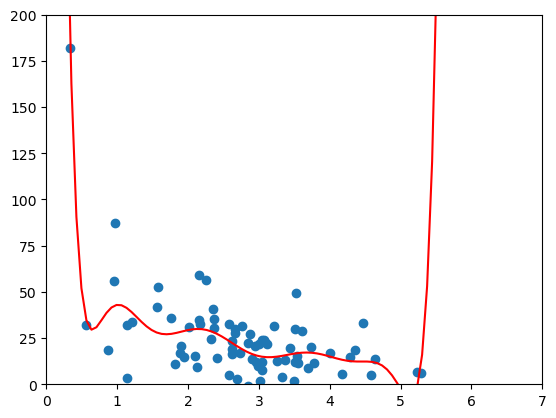

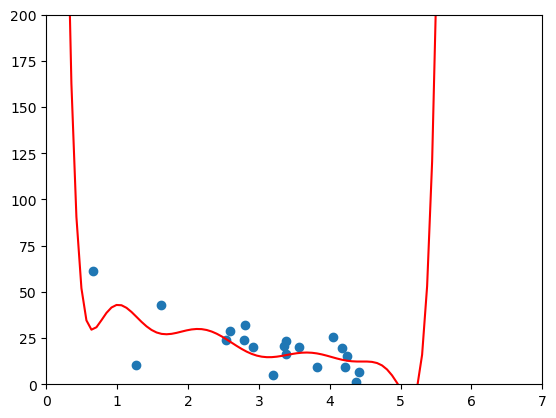

In [15]:
#lets try with higher degree
p10 = np.poly1d(np.polyfit(x, y, 10))

#plot the result
x = np.array(trainX)
y = np.array(trainY)

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p10(xp), c='r')
plt.show()

testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])

plt.scatter(testx, testy)
plt.plot(xp, p10(xp), c='r')
plt.show()

#the error for the test data



In [19]:
r2 = r2_score(testy, p10(testx))

print(r2)

r2 = r2_score(np.array(trainY), p10(np.array(trainX)))

print(r2)

0.22485167819222318
0.6818575244216912


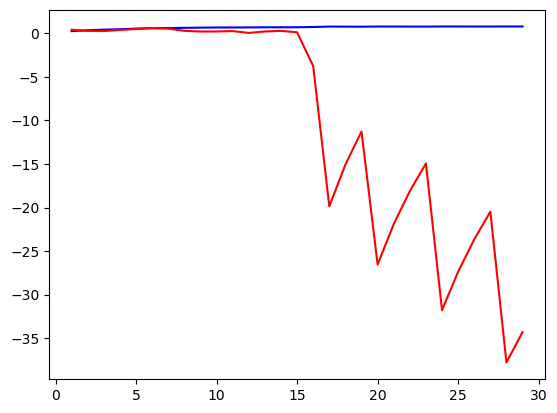

Best degree:  6


In [27]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#plot the R2Score for different degrees
degrees = np.arange(1, 30)
trainScore = []
testScore = []

for d in degrees:
    p = np.poly1d(np.polyfit(x, y, d))
    trainScore.append(r2_score(y, p(x)))
    testScore.append(r2_score(testy, p(testx)))

plt.plot(degrees, trainScore, c='b')
plt.plot(degrees, testScore, c='r')
plt.show()

#lets get the best degree for the test data

maxR2 = 0
bestD = 0
for d in degrees:
    p = np.poly1d(np.polyfit(x, y, d))
    r2 = r2_score(testy, p(testx))
    if r2 > maxR2:
        maxR2 = r2
        bestD = d

print("Best degree: ", bestD)

#6 is the best degree for the test data because it has the highest R2Score for the test data